In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
spectra = "D:/211214 mass spec/processed/211214 Srt mutants ctb 2hrs _33_BA4_01_81551.d.mzML"

plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/211214 Srt mutant CTB labelling 2 hours.xlsx"

In [4]:
eng.load_mzml(spectra, clear_hdf5=True)

Reading mzML: D:/211214 mass spec/processed/211214 Srt mutants ctb 2hrs _33_BA4_01_81551.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:/211214 mass spec/processed/211214 Srt mutants ctb 2hrs _33_BA4_01_81551.d.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


False

1309 2
Noise Level: 0.13509079814499117 Window: 0.6
Bad Peak [0.418833   0.87672748] 0.24195 [0.418833, 0.660783]
1.15547 0.21199999999999997
2.07835 0.15379999999999994
3.16332 0.16628000000000043
4.12788 0.16211999999999982
5.07978 0.26188000000000056
Getting scans: [123, 174]
Length merge axis: 38134
Getting scans: [346, 383]
Length merge axis: 38094
Getting scans: [603, 643]
Length merge axis: 38093
Getting scans: [838, 877]
Length merge axis: 37013
Getting scans: [1058, 1121]
Length merge axis: 36690


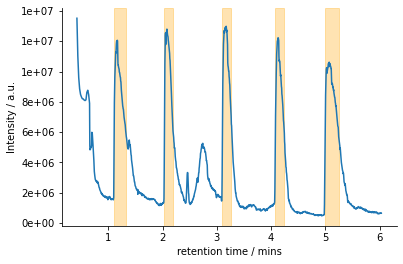

In [5]:
eng.config.chrom_peak_width = 0.6
eng.get_chrom_peaks(lb = 1, ub = 5.5) 
eng.add_chrom_peaks2() 
eng.plot_tic(peak_windows = True)

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [6]:
eng.update_config(masslb = 5000, massub = 25000, peakthresh = 0.05)
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.1556387000000008
Execution Time: 19.5802586
Execution Time: 0.5997167999999959
Peak info saved to: D:/211214 mass spec/processed\UniDec_Figures_and_Files\211214 Srt mutants ctb 2hrs _33_BA4_01_81551.d_extracts.txt


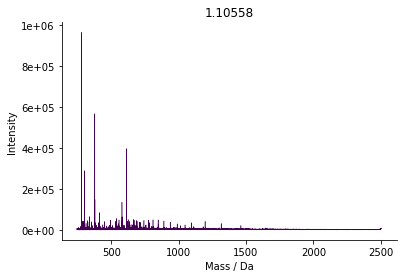

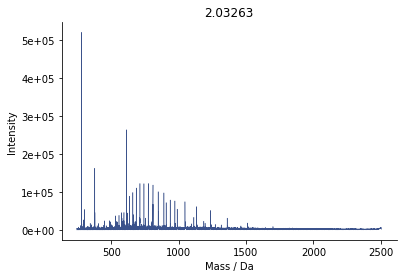

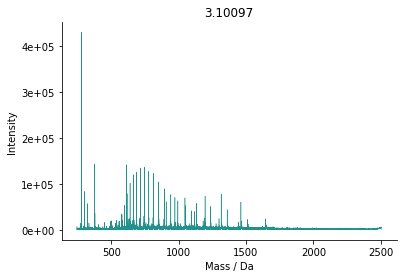

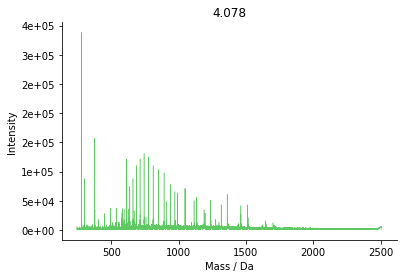

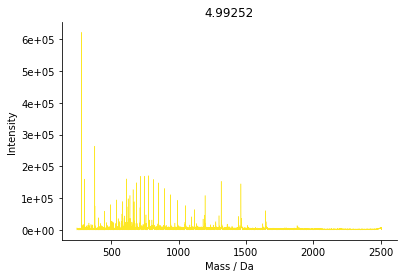

In [7]:
eng.plot_all(dtype = 'data2', combine = False, cmap = 'viridis')

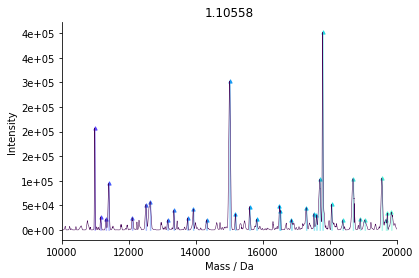

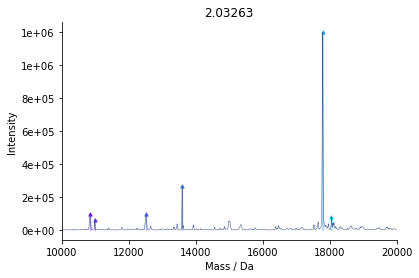

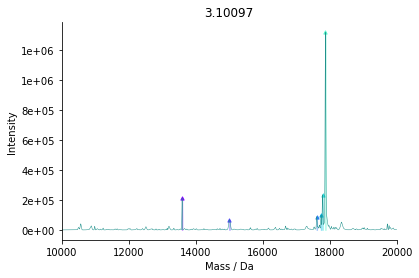

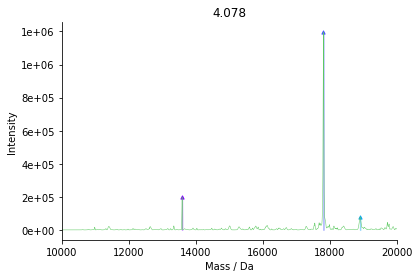

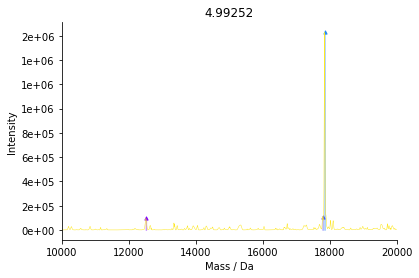

In [8]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [10000, 20000])

In [9]:
eng.upload_map(plate_map)

(      Reaction     Species  Concentration Units      Mass Reagent_Type  \
 0  Srt mutants      CTB-H6          100.0    uM  13597.42      Protein   
 1  Srt mutants  CTB-GVSEYG            NaN    uM  13151.97      Protein   
 2  Srt mutants      CTB-OH            NaN    uM  12559.36      Protein   
 
   Sequence  
 0      NaN  
 1      NaN  
 2      NaN  ,
             Type     Reaction Time Sortase  Species  Valid
 Well ID                                                   
 1        Protein  Srt mutants    2      1M      NaN   True
 2        Protein  Srt mutants    2      2M      NaN   True
 3        Protein  Srt mutants    2      3M      NaN   True
 4        Protein  Srt mutants    2    1+3M      NaN   True
 5        Protein  Srt mutants    2      5M      NaN   True)

In [10]:
eng.pmap

,Type,Reaction,Time,Sortase,Species,Valid
Well ID,,,,,,
1,Protein,Srt mutants,2,1M,NaN,True
2,Protein,Srt mutants,2,2M,NaN,True
3,Protein,Srt mutants,2,3M,NaN,True
4,Protein,Srt mutants,2,1+3M,NaN,True
5,Protein,Srt mutants,2,5M,NaN,True


In [11]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,Srt mutants,CTB-H6,100.0,uM,13597.42,Protein,NaN
1,Srt mutants,CTB-GVSEYG,NaN,uM,13151.97,Protein,NaN
2,Srt mutants,CTB-OH,NaN,uM,12559.36,Protein,NaN


In [12]:
eng.process_maps(groupby = 'Reaction', variable = 'Sortase')

In [13]:
eng.pmap2

,Type,Reaction,Time,Sortase,Species,Valid,CTB-GVSEYG,CTB-H6,CTB-OH,Spectra
Well ID,,,,,,,,,,
1,Protein,Srt mutants,2,1M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-...",<metaunidec.mudstruct.Spectrum object at 0x000...
2,Protein,Srt mutants,2,2M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-...",<metaunidec.mudstruct.Spectrum object at 0x000...
3,Protein,Srt mutants,2,3M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-...",<metaunidec.mudstruct.Spectrum object at 0x000...
4,Protein,Srt mutants,2,1+3M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-...",<metaunidec.mudstruct.Spectrum object at 0x000...
5,Protein,Srt mutants,2,5M,"[CTB-GVSEYG, CTB-H6, CTB-OH]",True,"<CTB-GVSEYG(Reaction = Srt mutants, Species = ...","<CTB-H6(Reaction = Srt mutants, Species = CTB-...","<CTB-OH(Reaction = Srt mutants, Species = CTB-...",<metaunidec.mudstruct.Spectrum object at 0x000...


invalidate data using eng.invalidate()

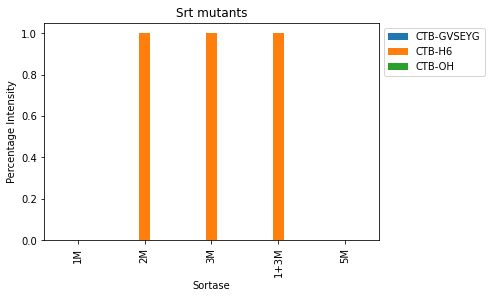

In [14]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Sortase')